In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
from tqdm import tqdm
import random
import pickle

# Loading the data from pre-saved pickle files

In [3]:
pickle_in = open("./resources/data/face_mask_1/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask_1/y_train.pickle","rb")
y_train = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask_1/X_valid.pickle","rb")
X_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask_1/y_valid.pickle","rb")
y_valid = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask_1/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./resources/data/face_mask_1/y_test.pickle","rb")
y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} y_train= {y_train.shape}")
print(f"X_valid= {X_valid.shape} y_valid= {y_valid.shape}")
print(f"X_test= {X_test.shape} y_test= {y_test.shape}")

X_train= (720, 227, 227, 3) y_train= (720, 1)
X_valid= (306, 227, 227, 3) y_valid= (306, 1)
X_test= (100, 227, 227, 3) y_test= (100, 1)


# Calculating the mean image as shown original in Alex net paper

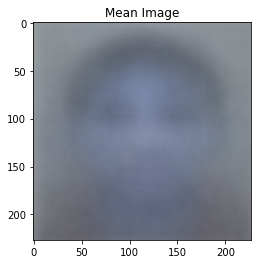

In [4]:
mean_img = np.mean(X_train, axis=0)
plt.imshow(mean_img.astype('uint8'))
plt.title('Mean Image')
plt.show()

# Subtracting the mean image from train,test and validation data

In [5]:
X_train_norm, X_valid_norm, X_test_norm = X_train-mean_img, X_valid-mean_img, X_test-mean_img

# Plotting the original and pre-processed images

Original images to the left and pre-processed image to the right

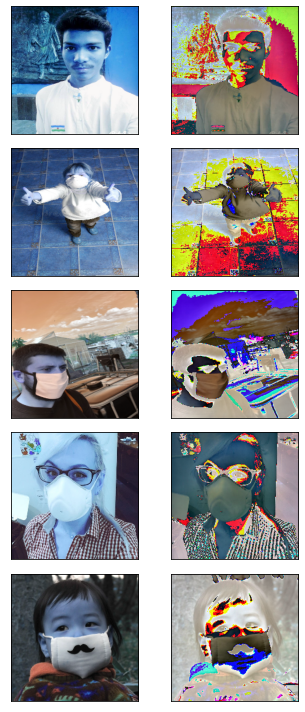

In [6]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [7]:
print(X_train.shape[1:])

(227, 227, 3)


# Defining the Model

In [10]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train.shape[1:]),
    
#     '''
#         Input shape = (227,227,3)
#         Output shape = [(W-K+2P)/S]+1

#         W = Input shape
#         K = Kernel size
#         P = padding
#         S = Stride

#     '''
    
#     '''
#         relu = max(0,x)
#         Here, output is directly the input if input is positive otherwise the output is 0
#         All the layers untill the final layer uses the 'ReLu' activation function
    
#     '''
    
#     ##Convolutional layer-1  
    
#     '''
#         Output image shape would be (55,55,3) where 3 represents the color chanels
#         Output shape considering the number of filters would be = (None,55,55,256)
#         Here, 256 is the number of filters used
#         and 'None' is the dimension for batch size which is a variable, thus ignoredduring Model.summary() 
        
#         **We will ignore 'None' while writting the output shape along with filters
#         **Output shape is written as 'OS'
    
#     '''
    
#     '''
#         ***Output shape will not change during activation, batch normalization layers or dense layers
#     '''
    
    layers.Conv2D(filters=256, kernel_size=(11,11), strides=(4,4), padding='valid'), # [(227-11_2*0)/4]+1 = 55; 

    ##Activation layer-1
    layers.Activation('relu'), #relu activation function has been used; shape remains same as (55,55,256)
    
    ##Max pooling layer-1
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'), # [(55-2)/2]+1 = 27.5; OS=(27,27,256)
    
    ##Batch normalization layer-1
    layers.BatchNormalization(), #OS=(27,27,256)
    
    
    
    ##Convolutional layer-2
    layers.Conv2D(filters=284, kernel_size=(11,11), strides=(1,1), padding='valid'), #[(27-11+0)/1]+1 = 17; OS=(17,17,284)
    
    ##Activation layer-2
    layers.Activation('relu'), #OS=(17,17,284)
    
    ##Max pollinglayer-2
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'), #[(17-2)/2]+1 = 8.5; OS=(8,8,284)
    
    ##Batch normalization layer-2
    layers.BatchNormalization(),#OS=(8,8,284)
    
    
    
    ##Convolutional layer-3
    layers.Conv2D(filters=360, kernel_size=(3,3), strides=(1,1), padding='valid'), #[(8-3+0)/1]+1=6; OS=(6,6,360)
    
    ##Activation layer-3
    layers.Activation('relu'),#OS=(6,6,360)
    
    ##Batch normalization layer-3
    layers.BatchNormalization(),#OS=(6,6,360)
    
    
    
    ##Convolutional layer-4
    layers.Conv2D(filters=360, kernel_size=(3,3), strides=(1,1), padding='valid'), #[(6-3+0)/1]+1=4; OS=(4,4,360)
    
    ##Activation layer-4
    layers.Activation('relu'),#OS=(4,4,360)
    
    ##Batch normalization layer-4
    layers.BatchNormalization(),#(4,4,360)
    
    
    
    ##Convolutional layer-5    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'), #[(4-3+0)/1]+1=2; OS=(2,2,256)
    
    ##Activation layer-5
    layers.Activation('relu'),#OS=(2,2,256)
    
    ##Max pooling layer-5
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'), #[(2-2)/2]+1=1; OS=(1,1,256)
    
    ##Batch normalization layer-5
    layers.BatchNormalization(),#(1,1,256)
    
    
#     '''
#         This layer flattens the matrix in an 1-dimensional array where,
#         Input shape = (m,n,d)
#         Output shape = m*n*d
        
#         So, Input shape = (1,1,256)
#         Output shape = 1*1*256 = 256
        
#         *Here flattening layer is used bacause dense or fully connected layers do to support matrix input
    
#     '''
    
    ##Falttening layer
    layers.Flatten(), #OS=256
    
#     '''
#     Units is the number of neurons the shape of the output of the dense layer is 
#     equal to the number of neurons and it is 1-dimentional
    
#     The dimension is Model.summary() is (None,4596) where, 4596 is the number of neurons
#     here, 'None' is again undefined for variable batch size
    
#     '''
    ##Dense layer-1
    layers.Dense(units=4596),#OS=(4596,)
    layers.Activation('relu'),
    
#     '''
#         Dropout layer nullifies the imapact of some neurons from one layer to the next
#         this makes the model forget some of its knowledge
#         This method is applied to reduce overfitting

#         How many neuron's contribution will be nullifies is defined by the number passed as an argument to the Dropout() method
#         In our case the number is 0.5 which means 50% neuron's contribution will be nullified from Dense layer-1
#         before sending the values to the next layer

#     '''
    ##Dropout layer-1
    layers.Dropout(0.5), #Dropout 50% of the neurons from previous layer
    layers.BatchNormalization(),

    ##Dense layer-2
    layers.Dense(units=4596),#OS=(4596,)
    layers.Activation('relu'),
    layers.BatchNormalization(),

    ##Dense layer-3
    layers.Dense(units=4596),#OS=(4596,)
    layers.Activation('relu'),
    layers.BatchNormalization(),
    
    ##Dense layer-4
    layers.Dense(units=4596),#OS=(4596,)
    layers.Activation('relu'),
    
    ##Dropout layer-2
    layers.Dropout(0.5),#Dropout 50% of the neurons from previous layer
    
    layers.BatchNormalization(),
    
#     '''
#         This is the output layer which is responsible for producing the final predictions
#         its consists of 2 neurons as for this dataset we have 2 possible predictions
#     '''
    ##Dense layer-5
    layers.Dense(2),
    
#     '''
#         Softmax activation function is used in the final layer for getting the probability 
#         of the prediction belonging to each class
#         Softmax is used for multi-class classification
    
#     '''
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 256)       93184     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 256)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 256)       1024      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 17, 17, 284)       8797468   
_________________________________________________________________
activation_1 (Activation)    (None, 17, 17, 284)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 284)         0

# Compiling the Model

Loss = Loss is calculation of the difference between the predicted value and actual value. 

For this model,
- 'sparse_categorical_crossentropy' is used as the loss function
- cross entropy is usually used for calculating loss in a classification problem
- There is another cross entropy function named 'categorical_crossentropy'
- 'categorical_crossentropy' is used if the data is one-hot encoded
- 'sparse_categorical_crossentropy' uses a single integer for a class taht's why it is used when data is not one hot encoded
- As our data is not one-hot encoded we have used the 'sparse_categorical_crossentropy' as the loss function

Optimizer = An optimizer is a function or an algorithm that modifies the attributes of the neural network, such as weights and learning rate to minimize the loss function.

For this model, 
- 'adam' optimizer has been used. Usually gradient descent is used as an optimizer. 
- 'adam' is more effecient is computation and memory consumption than gradient descent. 
- 'adam' used some hyperparameters such as, learning_rate, beta_1,beta_2 etc. These are defined as the original paper.
- Gradient descent uses a constant learning rate where adam uses an adaptive learning rate.


Metrics = A metric is a function that is used to judge the performance of your model
 Various values can be monitored for analyzing the performance of the model. For our case we have used 'accuracy' as a way to judge our model

In [11]:
model.compile(
    
    loss='sparse_categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

# Trainning or Fitting the Model

x = The training data needs to be passed as x
y = The true labels/classes of the training data is passed as y

epochs = A single epoch represents all of the training data being passed into the model once. One forward pass and one backward pass together are counted as one epoch.Our model wil be trainned for 20 epochs which means the trainning data will be passed through the model 20 times.

validation = validation data is a data outside of the training dataset used as a psedu test data. Validation data can give us an estimation of how the model might perform on unseen test data/real world data. Validation data is different from test data as it is also used for adjusting the weighs in the model. So, the model does learn from the validation data but not from the test data.

batch size= Size of data to be passed thorugh the model in each iteration of an epoch. 
In our case,

Size of total training data = 720
batch_size = 32

32 training data will be passed for a single iteration of an epoch
For 32 batch and 720 data a single epoch will have = 22.5 = 23 iterations to complete 720 data in a single epoch

In [12]:
h = model.fit(x=X_train_norm, y=y_train, epochs=20, validation_data=(X_valid_norm, y_valid), batch_size=32)

Epoch 1/20
23/23 [==============================] - 62s 3s/step - loss: 2.2384 - accuracy: 0.7458 - val_loss: 598.9763 - val_accuracy: 0.5000
Epoch 2/20
23/23 [==============================] - 66s 3s/step - loss: 0.3938 - accuracy: 0.8639 - val_loss: 277.6827 - val_accuracy: 0.5000
Epoch 3/20
23/23 [==============================] - 67s 3s/step - loss: 0.3335 - accuracy: 0.8792 - val_loss: 81.2103 - val_accuracy: 0.5098
Epoch 4/20
23/23 [==============================] - 63s 3s/step - loss: 0.4279 - accuracy: 0.8458 - val_loss: 18.0264 - val_accuracy: 0.5359
Epoch 5/20
23/23 [==============================] - 67s 3s/step - loss: 0.3544 - accuracy: 0.8694 - val_loss: 9.1930 - val_accuracy: 0.6699
Epoch 6/20
23/23 [==============================] - 65s 3s/step - loss: 0.2963 - accuracy: 0.8972 - val_loss: 3.1460 - val_accuracy: 0.7549
Epoch 7/20
23/23 [==============================] - 70s 3s/step - loss: 0.2433 - accuracy: 0.9042 - val_loss: 0.6945 - val_accuracy: 0.8464
Epoch 8/20
23/

# Plotting the trainning & Validation accuracy & loss

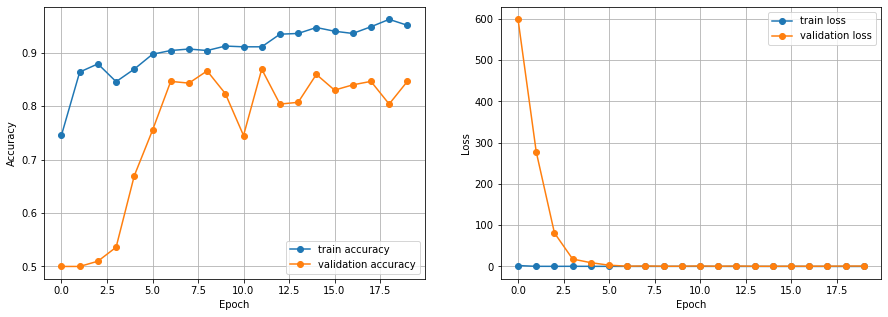

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

# Testing the model

In [14]:
y_pred = model.predict(X_test)

In [15]:
y_pred.shape

(100, 2)

# Function to collect all predictions for test data

In [16]:
prediction = []
for i in range(100):
    prediction.append(np.argmax(y_pred[i]))
prediction = np.array(prediction)

# Generating a confusion matrix

The generated confusion matrxi shows the models ability to truly and falsely predict the classes. 
- The model has correctly predicted 40 images as 'Mask' and incorrectly predicted 10 'Mask' images as 'non-mask'
- The model has correctly predcited 34 instances as 'Non-mask' and incorrectly predicted 16 'Non-mask' images as 'Mask'

The model is better at identifying images with no mask compared to images with mask.

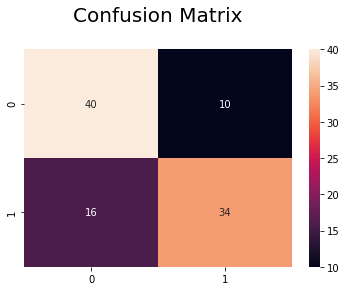

In [18]:
from sklearn import metrics
import seaborn as sns

confusionMatrix  = metrics.confusion_matrix(y_test,prediction)
sns.heatmap(confusionMatrix,annot=True)
plt.title('Confusion Matrix\n', fontsize = 20)
plt.show()

# Saving the model

In [19]:
if os.path.isfile('model/face_mask_detection_model.h5') is False:
    model.save('model/face_mask_detection_model.h5')

In [ ]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_test[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_test[].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()